Python Case Study 1: Life Expectancy Averaged Dataset
Data set resources here: https://www.kaggle.com/datasets/shreyasg23/life-expectancy-averaged-dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

df = pd.read_csv('C:\\Users\\vielu\\OneDrive\\Documents\\Data Analysis\\Python Study\\Life-Expectancy-Data-Averaged.csv')


Observe and understand the data first.

In [26]:
print(df.head())
print(df.dtypes)

               Country                         Region    Year  Infant_deaths  \
0          Afghanistan                           Asia  2007.5       71.08125   
1              Albania                 Rest of Europe  2007.5       15.25625   
2              Algeria                         Africa  2007.5       26.75625   
3               Angola                         Africa  2007.5       88.76875   
4  Antigua and Barbuda  Central America and Caribbean  2007.5        9.47500   

   Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
0           98.61250       265.804969             0.016125      64.5625   
1           17.14375        83.132969             4.696875      98.0000   
2           31.19375       113.439281             0.400625      88.3125   
3          144.16250       297.844063             4.935625      68.8125   
4           11.51875       142.478813             7.755000      98.2500   

   Measles       BMI    Polio  Diphtheria  Incidents_HIV  GDP_per_ca

1. What is the country that have the highest and lowest Infant_deaths, Under_five_deaths and Adult_mortality

* Highest and Lowest country of Infant_deaths


In [27]:

Highest_infant_deaths = df[df['Infant_deaths']==df['Infant_deaths'].max()]
Lowest_infant_deaths = df[df['Infant_deaths']==df['Infant_deaths'].min()]
Result_infant_deaths = pd.concat([
    Highest_infant_deaths[['Country','Region','Infant_deaths']],
    Lowest_infant_deaths[['Country','Region','Infant_deaths']]
    ])
print(Result_infant_deaths)

          Country  Region  Infant_deaths
141  Sierra Leone  Africa      115.71875
142     Singapore    Asia        2.38125


* Highest and Lowest country of Under_five_deaths

In [28]:
Highest_five_deaths=df[df['Under_five_deaths']==df['Under_five_deaths'].max()]
Lowest_five_deaths=df[df['Under_five_deaths']==df['Under_five_deaths'].min()]
Result_five_deaths = pd.concat([
    Highest_five_deaths[['Country','Region','Under_five_deaths']],
    Lowest_five_deaths[['Country','Region','Under_five_deaths']]
    ])
print(Result_five_deaths)

          Country  Region  Under_five_deaths
141  Sierra Leone  Africa            178.725
142     Singapore    Asia              3.000


* Highest and Lowest country of Adult_mortality

In [29]:
Highest_adult_mortality = df[df['Adult_mortality'] == df['Adult_mortality'].max()]
Lowest_adult_mortality = df[df['Adult_mortality'] == df['Adult_mortality'].min()]
Result_adult_mortality = pd.concat([
    Highest_adult_mortality[['Country','Region','Adult_mortality']],
    Lowest_adult_mortality[['Country','Region','Adult_mortality']]
    ])
print(Result_adult_mortality)

      Country          Region  Adult_mortality
178  Zimbabwe          Africa       572.974312
102     Malta  European Union        57.710313


2. Top 5 and Last 5 countries realted to Life_expectancy

In [30]:
df_sorted_life = df.sort_values(by='Life_expectancy', ascending = False)
df_top5_life = df_sorted_life.head(5)
df_tail5_life = df_sorted_life.tail(5)
print(df_top5_life[['Country','Life_expectancy']])
print(df_tail5_life[['Country','Life_expectancy']])

         Country  Life_expectancy
82         Japan         82.45625
154  Switzerland         81.67500
73       Iceland         81.57500
80         Italy         81.38750
7      Australia         81.11250
                      Country  Life_expectancy
178                  Zimbabwe         48.66250
141              Sierra Leone         46.70000
54                   Eswatini         46.69375
31   Central African Republic         46.48125
92                    Lesotho         45.60625


We can see that the top 5 countries are developed country while the last 5 are developing one, is there any relationship bewtween economy and life expectancy?

3. Observe the relation between Life_expectancy and GDP using a scatter plot

0.5949439250679431 1.6091712635839526e-18


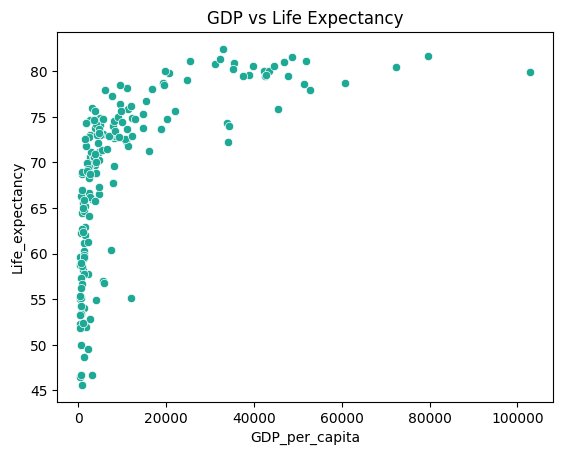

In [31]:
sns.scatterplot(data = df, x='GDP_per_capita', y = 'Life_expectancy', color = '#1EA896')
plt.title('GDP vs Life Expectancy')

x = df['GDP_per_capita']
y = df['Life_expectancy']
correlation_coefficient,p_value = pearsonr(x,y)
print(correlation_coefficient, p_value)

We see that the p is a very small number (essentially close to zero), so we can say that life expectancy and GDP are significantly related. 
At the same time, correlation_coefficient is 0.59, we can say that these 2 items have [moderate positive] (https://resources.nu.edu/statsresources/correlation)

As an assumption, countries with higher GDP have more developed medical and insurance systems, which can extend life expectancy.


4. Observe the relation between Alcohol_consumption and Life_expectancy

0.4160608787716588 6.9431043641587396e-09


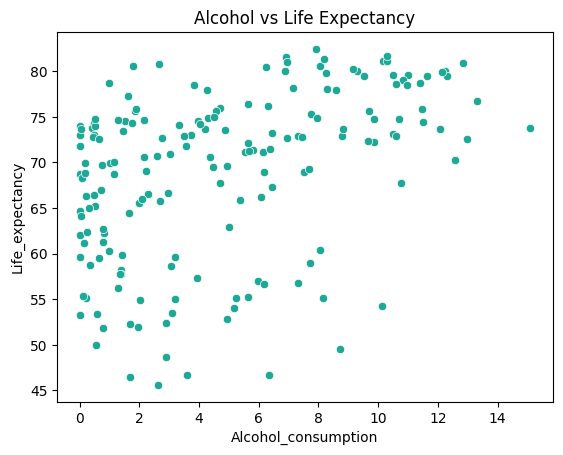

In [32]:
sns.scatterplot(data = df, x = 'Alcohol_consumption', y = 'Life_expectancy', color = '#1EA896')
plt.title('Alcohol vs Life Expectancy')

x = df['Alcohol_consumption']
y = df['Life_expectancy']
correlation_coefficient,p_value = pearsonr(x,y)
print(correlation_coefficient, p_value)

We see that the p is a very small number (essentially close to zero), so we can say that life expectancy and Alcohol are significantly related

At the same time, correlation_coefficient is 0.42, we can say that these 2 items have [week to moderate positive] (https://resources.nu.edu/statsresources/correlation)

This result might differ slightly from our standard thinking, as alcohol is not considered beneficial for health. As an assumption, people in countries with stronger economies might consume more alcohol compared to those in developing countries. Let's create a chart to test this idea.


0.45325268651678585 1.8766364597314269e-10


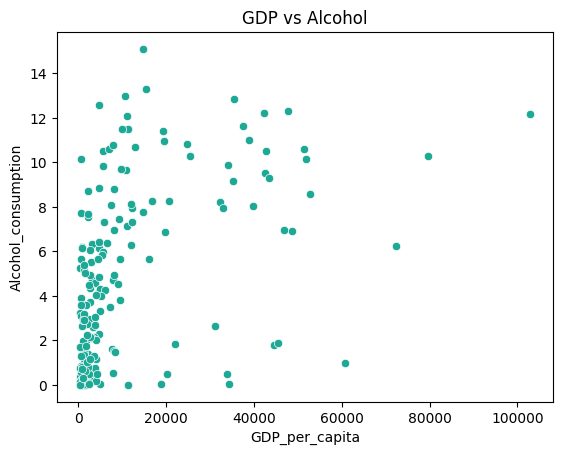

In [33]:

sns.scatterplot(data = df, x = 'GDP_per_capita', y = 'Alcohol_consumption', color = '#1EA896')
plt.title('GDP vs Alcohol')

x = df['GDP_per_capita']
y = df['Alcohol_consumption']
correlation_coefficient,p_value = pearsonr(x,y)
print(correlation_coefficient, p_value)


We can conclude that there are positive relation between GDP and Alcohol consumption


5. Observe the relation between Schooling and Life_expectancy

0.73791128671952 4.813359955090363e-32


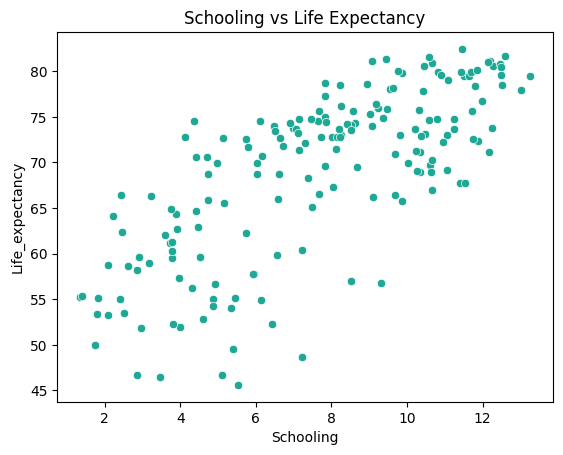

In [34]:
sns.scatterplot(data = df, x = 'Schooling', y = 'Life_expectancy', color = '#1EA896')
plt.title('Schooling vs Life Expectancy')

x = df['Schooling']
y = df['Life_expectancy']
correlation_coefficient,p_value = pearsonr(x,y)
print(correlation_coefficient, p_value)

We can conclude that education and life expectancy have a strong correlation. Education is very important for all counties.

6. Last, let make a heatmap to better visualize the correlation between each items.

<Axes: >

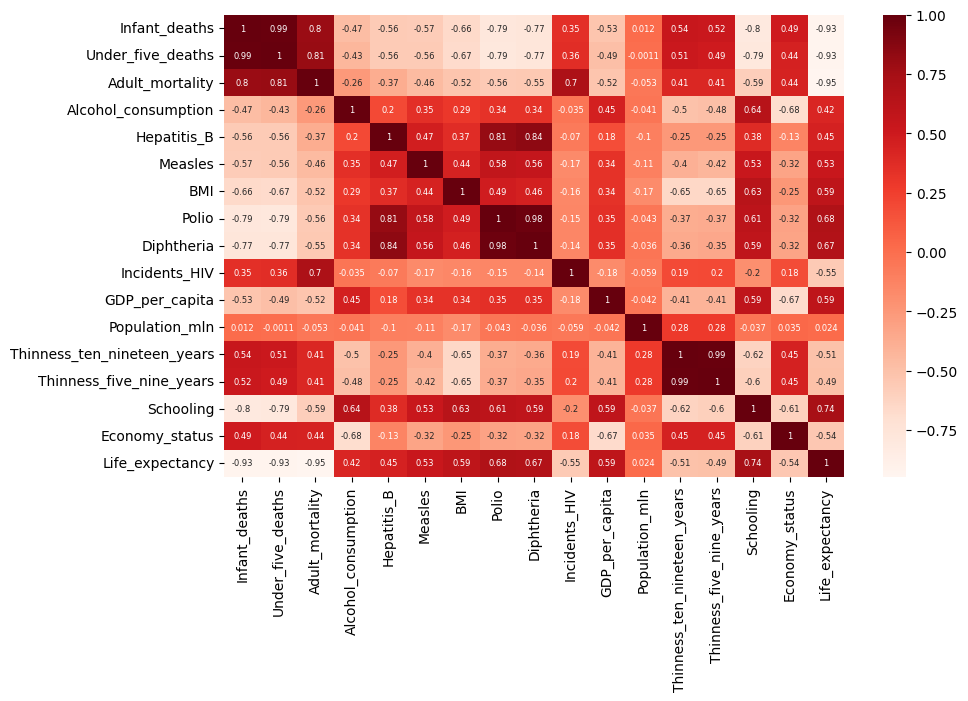

In [35]:
df_corr = df.iloc[:,3:]
corr = df_corr.corr()
plt.figure(figsize=(10,6))
sns.heatmap (data = corr, cmap='Reds', annot = True, annot_kws={"size":6})